# I.Exploration des données 

## Étape 1 : Chargement des données

#### 1.Importer les bibliothèques nécessaires :

In [63]:
import pandas as pd #pour la manipulation de données
import numpy as np #pour les calculs numériques
import matplotlib.pyplot as plt #pour la visualisation
import seaborn as sns #pour la visualisation avancés

#### 1.Charger le dataset :

In [64]:
df =  pd.read_csv("Loan_Prediction.csv") #importation des données
df.head() #affichage des 5 premières lignes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [65]:
print(df.info())  # Affiche les types de données et les valeurs manquantes
print(df.shape)   # Affiche le nombre de lignes et de colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None
(367, 12)


#### 2.Nettoyage des donneés:

In [66]:
# Afficher les valeurs manquantent
print(df.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


**Interprétation:**
 * Identifier les colonnes avec beaucoup de valeurs manquantes.
 * Décidez comment gérer ces valeurs manquantes(supressin , imputation , interpolation , etc)

In [67]:
 # Remplacer les valeurs manquantes
df[['LoanAmount','Loan_Amount_Term','Credit_History']] = df[['LoanAmount','Loan_Amount_Term','Credit_History']].interpolate(method='linear') #pour les varibale numérique
df[['Gender' , "Dependents" , "Self_Employed"]].fillna(df[['Gender' , "Dependents" , "Self_Employed"]].mode().iloc[0]) #pour les variables catégorielles

,Gender,Dependents,Self_Employed
0,Male,0,No
1,Male,1,No
2,Male,2,No
3,Male,2,No
4,Male,0,No
...,...,...,...
362,Male,3+,Yes
363,Male,0,No
364,Male,0,No
365,Male,0,No


In [139]:
df[['Gender' , "Dependents" , "Self_Employed"]].dropna() #Supprimer les valeurs manquantes
df.shape #afficher le nombre de lignes et de colonnes

(367, 12)

## Étape 2 : Analyse univariée

#### 1.Analyser les variables numériques :

#### 1.Charger le dataset :

In [77]:
print(df.describe()) #Afficher les statistiques descriptives

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  367.000000        367.000000   
mean       4805.599455        1569.577657  136.427793        342.495913   
std        4910.685399        2334.232099   61.481857         64.760546   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  101.000000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      367.000000  
mean         0.831063  
std          0.369706  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


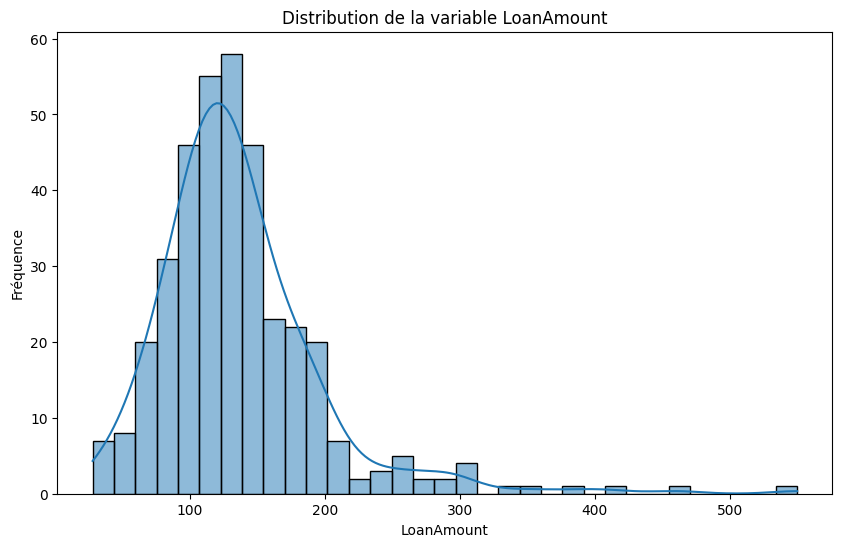

In [126]:
# Visualiser la distribution d'une variable numérique avec un histogramme
plt.figure(figsize=(10, 6)) 
sns.histplot(df['LoanAmount'] , kde=True) #kde=True pour afficher la densité
plt.title('Distribution de la variable LoanAmount')
plt.ylabel('Fréquence')
plt.xlabel('LoanAmount')
plt.show()

**Interprétation:**
* Le graphique montre une distribution asymétrique (non symétrique).

* La majorité des valeurs de LoanAmount se concentrent dans les plages inférieures (entre 0 et 200), avec une   fréquence élevée.

* La fréquence diminue progressivement à mesure que LoanAmount augmente.

#### 2.Analyser les variables catégorielles :

In [94]:
# Compter les occurrences des variables catégorielles
print(df['Gender'].value_counts())
print(df['Dependents'].value_counts())

Gender
Male      286
Female     70
Name: count, dtype: int64
Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64


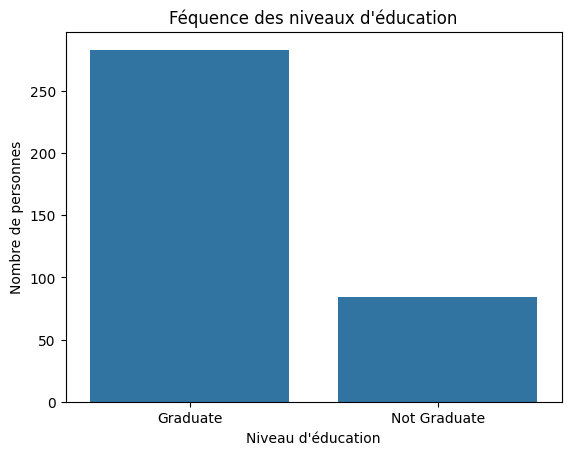

In [127]:
#Afficher le nombre de personnes par niveau d'éducation
sns.countplot(x='Education', data=df) 
plt.title("Féquence des niveaux d'éducation")
plt.ylabel('Nombre de personnes')
plt.xlabel('Niveau d\'éducation')
plt.show()

**Interprétation:**
pour ce graphe il ne montre que le nombre de personne Graduate et > 250 , et les plus que le nombre de personne Not Graduate proche de 100.

## Étape 3 : Analyse bivariée

#### 1.Analyser la relation entre deux variables numériques :

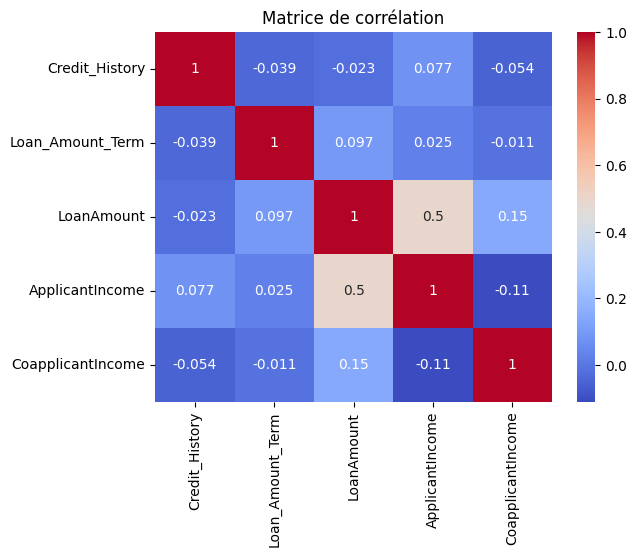

In [128]:
#Matrice de corrélation
corr = df[['Credit_History','Loan_Amount_Term','LoanAmount','ApplicantIncome','CoapplicantIncome']].corr()
sns.heatmap(corr, annot=True , cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

**Interprétation:**
Ce graphe montre la relations entre les varaible :
* On a la majorité des correlation sont faible , on trouve qu'on a une seule relation significative qui la corrélation *0.5* c'est une corrélation positive entre le montant du prêt et le revenu du demandeur.

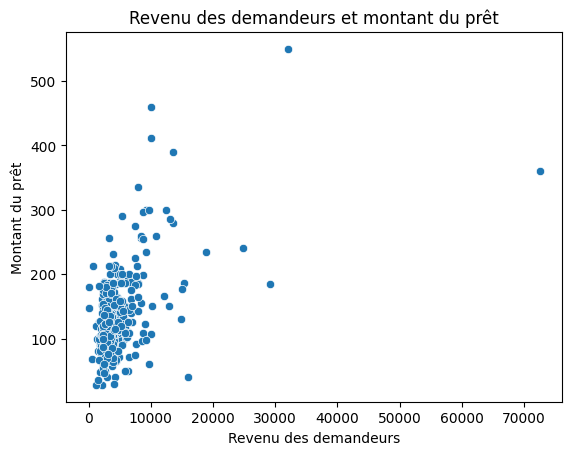

In [130]:
# nuage de points 
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df) # Visualiser la relation entre le revenu et le montant du prêt
plt.title('Revenu des demandeurs et montant du prêt')
plt.ylabel('Montant du prêt')
plt.xlabel('Revenu des demandeurs')
plt.show()

**Interprétation:**
Le graphique montre une relation positive entre le revenu des demandeurs et le montant du prêt. Cela signifie qu'à mesure que le revenu des demandeurs augmente, le montant du prêt demandé a tendance à augmenter également.

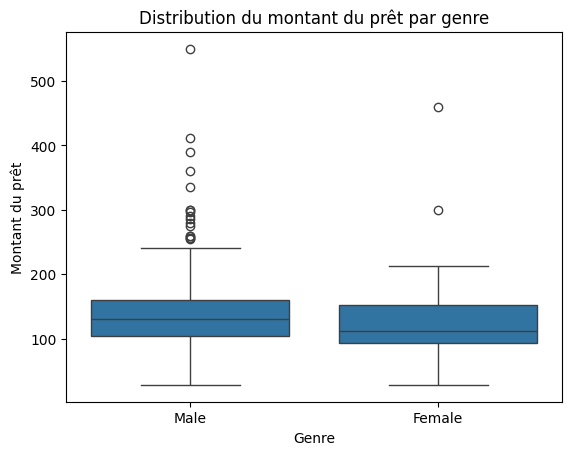

In [131]:
# Analyser un relation entre une variable catégorielle et une variable numérique
sns.boxplot(x='Gender', y='LoanAmount', data=df)
plt.title("Distribution du montant du prêt par genre")
plt.ylabel('Montant du prêt')
plt.xlabel('Genre')
plt.show()

**Interprétation:**
* Distribution par genre :

  *  Male (Hommes) : La distribution du montant du prêt pour les hommes semble varier, avec des valeurs allant de 0 à 500. Il y a une concentration de prêts dans la plage de 200 à 400.

  * Female (Femmes) : La distribution pour les femmes semble similaire, mais avec une concentration légèrement plus faible dans les montants élevés (au-dessus de 300).

* Comparaison entre les genres :

  * Les hommes ont tendance à demander des montants de prêt légèrement plus élevés que les femmes, en particulier dans la plage de 300 à 500.

  * Les femmes ont une distribution plus concentrée dans les montants de prêt inférieurs (entre 100 et 300).

In [111]:
# Analyser un relation entre deux variables catégorielle
print(pd.crosstab(df['Gender'], df['Education']))

Education  Graduate  Not Graduate
Gender                           
Female           56            14
Male            220            66


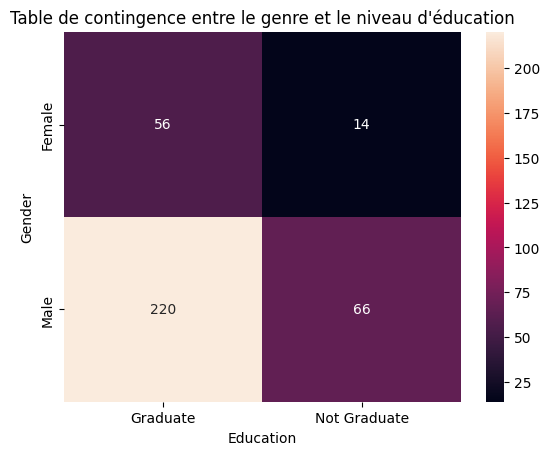

In [133]:
# Visualiser les fréquences croisées avec une heatmap
sns.heatmap(pd.crosstab(df['Gender'], df['Education']) , annot=True , fmt='d')
plt.title('Table de contingence entre le genre et le niveau d\'éducation')
plt.show()

**Interprétation:**
* Ce Graphe montre la table de contingence de la relation entre deux vaible catégorique Gender et éducation .
* La mojrité des hommes dans le dataset sont diplômés et même pour les femmes mais en trouve que le nombre des hommes et plus grande que les femmes dans les deux cas d'éducation.

## Étape 4 : Analyse multivariée

#### 1.Analyser les interactions entre plusieurs variables :

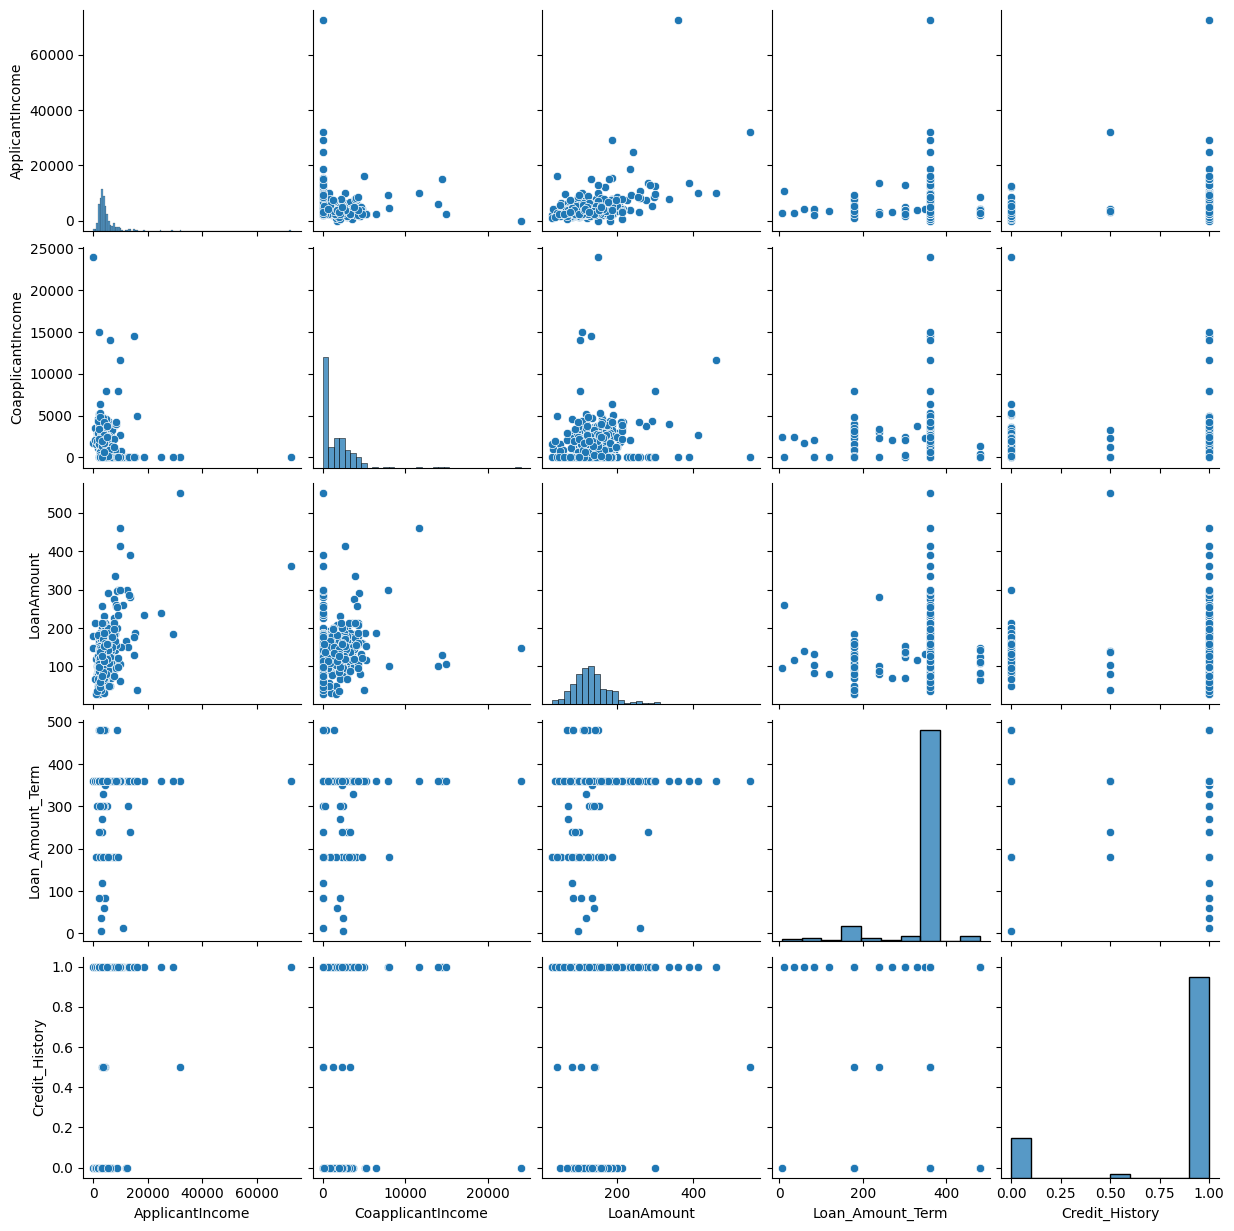

In [ ]:
# Analyser les interactions entre plusieurs variables numériques
# Utiliser un pairplot pour visualiser les relations par paires
sns.pairplot(df)
plt.show()

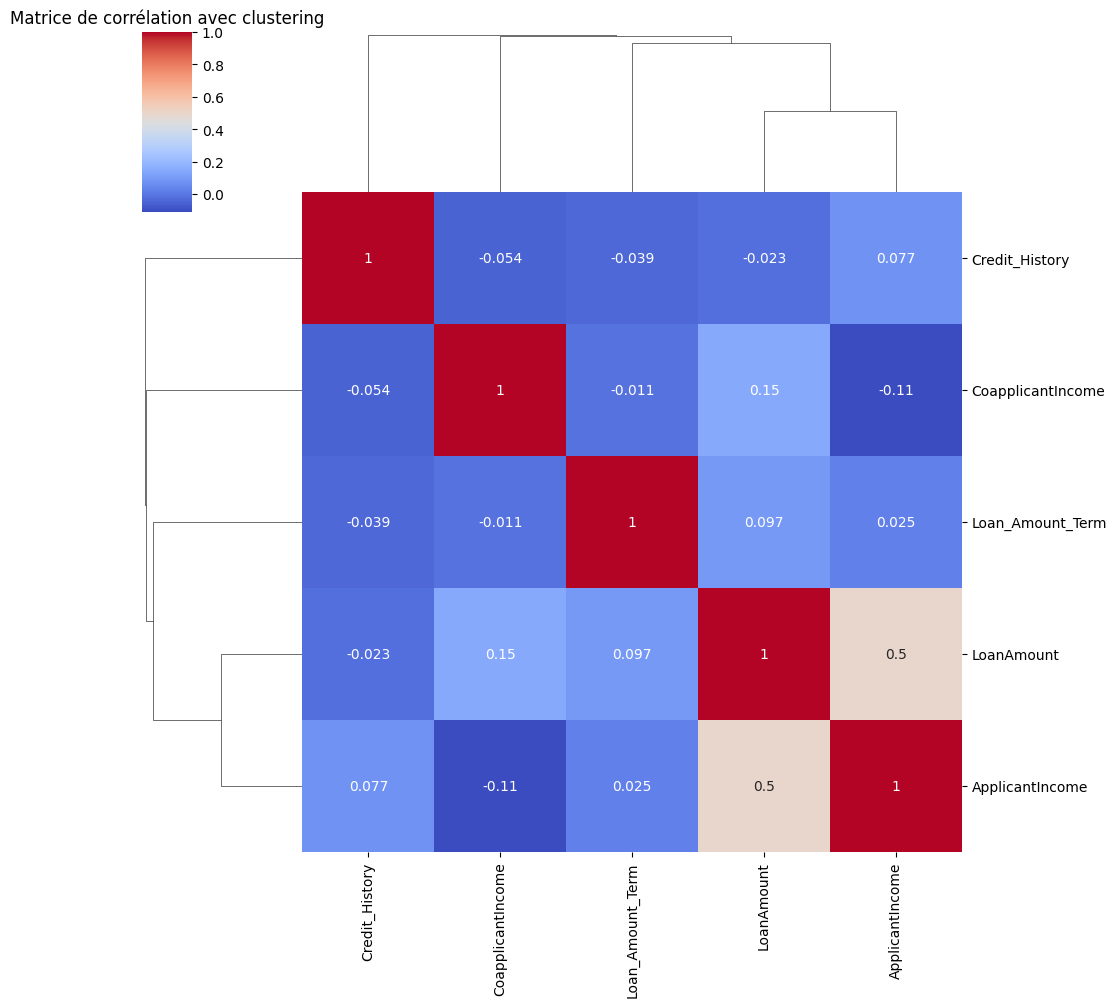

In [138]:
#Heatmap avec clustring 
corr = df[['Credit_History','Loan_Amount_Term','LoanAmount','ApplicantIncome','CoapplicantIncome']].corr()
sns.clustermap(corr, annot=True , cmap='coolwarm')
plt.title('Matrice de corrélation avec clustering')
plt.show()

**Interprétation:**
* Clustering : Le clustering dans la matrice de corrélation regroupe les variables qui ont des corrélations similaires.

   * Groupe 1 : LoanAmount et ApplicantIncome (corrélation de 0.5).

   * Groupe 2 : Credit_History, CoapplicantIncome, et Loan_Amount_Term (corrélations faibles).

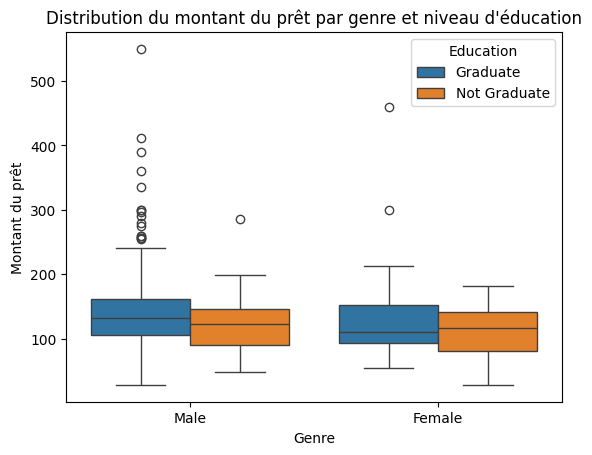

In [135]:
sns.boxplot(x='Gender', y='LoanAmount', hue='Education', data=df) # Visualiser la distribution du montant du prêt par genre et niveau d'éducation
plt.title("Distribution du montant du prêt par genre et niveau d'éducation")
plt.ylabel('Montant du prêt')
plt.xlabel('Genre')
plt.show()

**Interprétation:**
* Distribution par genre et niveau d'éducation :

  * Hommes diplômés (Male Graduate) : La distribution du montant du prêt pour les hommes diplômés semble varier, avec des valeurs allant de 0 à 500. Il y a une concentration de prêts dans la plage de 200 à 400.

  * Hommes non diplômés (Male Not Graduate) : La distribution pour les hommes non diplômés est similaire, mais avec une concentration légèrement plus faible dans les montants élevés (au-dessus de 300).

  * Femmes diplômées (Female Graduate) : La distribution pour les femmes diplômées semble similaire à celle des hommes diplômés, avec une concentration dans la plage de 200 à 400.

  * Femmes non diplômées (Female Not Graduate) : La distribution pour les femmes non diplômées est plus concentrée dans les montants inférieurs (entre 100 et 300).